## Importing Liabrary

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

## Loading Dataset

In [42]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train=x_train/255
x_test=x_test/255

## Visualizing Dataset

In [43]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


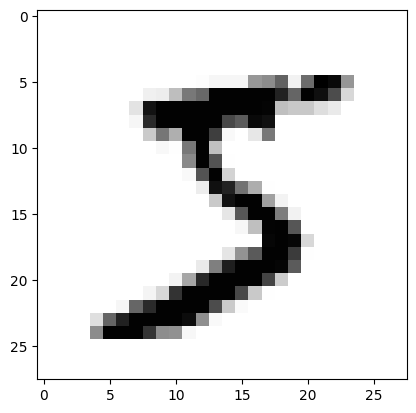

In [44]:
plt.imshow(x_train[0], cmap='Greys')

## Building Model

In [45]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation='softmax', input_shape=x_train.shape[1:])
])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_onehot_train=tf.one_hot(y_train,10)
model_lr.fit(x_train,y_onehot_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4711 - accuracy: 0.8763


In [47]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation='softmax', input_shape=x_train.shape[1:])
])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [49]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=False)


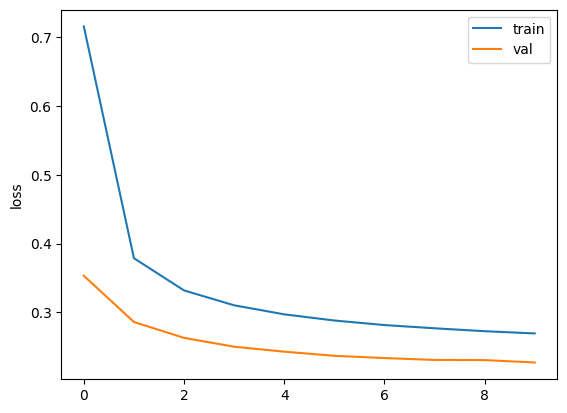

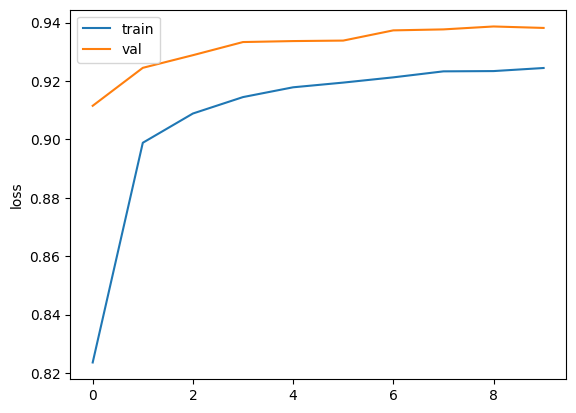

In [52]:
plt.plot(history_lr.history['loss'],label='train')
plt.plot(history_lr.history['val_loss'],label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'],label='train')
plt.plot(history_lr.history['val_accuracy'],label='val')
plt.ylabel('loss')
plt.legend()
plt.show()


In [53]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9255


[0.26741811633110046, 0.9254999756813049]

1/1 [==============================] - 0s 51ms/step
[1.0751344e-05 5.7695893e-10 3.3331169e-05 5.9260381e-03 8.7712129e-07
 3.3734290e-05 4.2288919e-09 9.9339241e-01 3.2931130e-05 5.6982244e-04] => 7


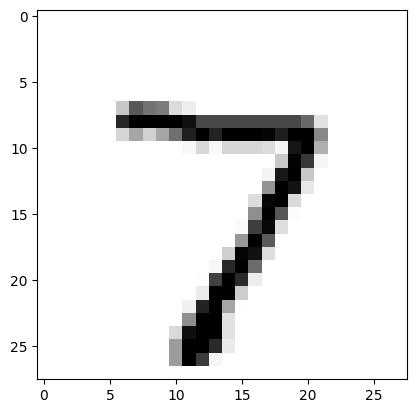

[4.6989342e-04 2.2153463e-05 9.8718077e-01 9.0001425e-04 1.7525638e-12
 6.2971944e-03 4.8914542e-03 3.3459926e-14 2.3851085e-04 3.8858104e-11] => 2


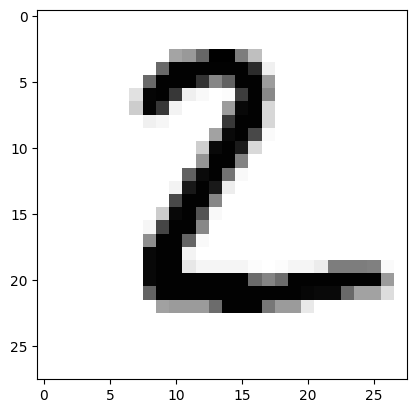

[6.8518548e-06 9.7804123e-01 1.0672471e-02 2.5074398e-03 1.8686306e-04
 6.9741806e-04 1.1306930e-03 1.9138326e-03 4.5393743e-03 3.0371943e-04] => 1


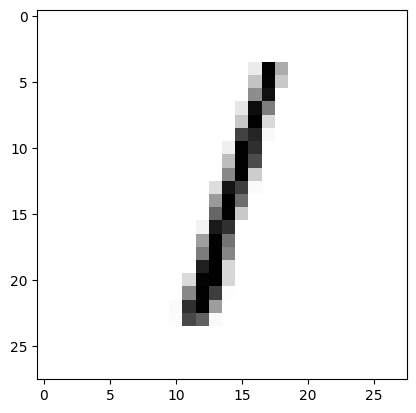

[9.9945182e-01 1.4546303e-10 1.3775870e-04 7.4093418e-06 7.4254842e-08
 1.7731501e-04 1.2991932e-04 3.6202160e-05 3.9106704e-05 2.0303776e-05] => 0


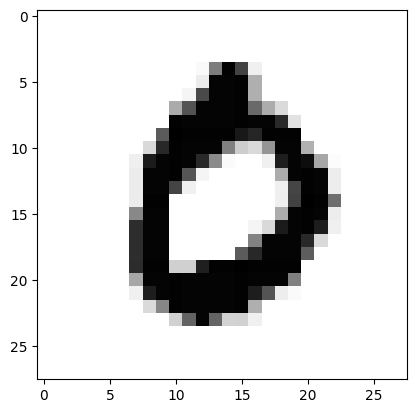

[4.2091927e-04 1.4747029e-06 2.8413408e-03 7.9515645e-05 9.5444453e-01
 1.7169731e-04 2.4390996e-03 3.7716767e-03 6.0305377e-03 2.9799288e-02] => 4


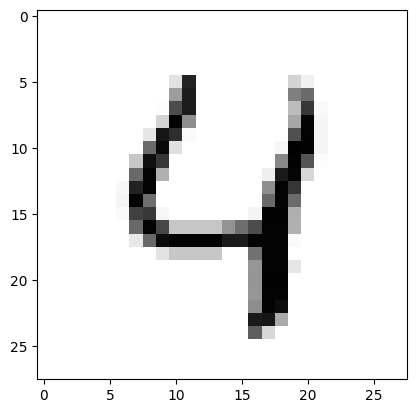

In [56]:
probs=model_lr.predict(x_test[:5])
preds=np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], "=>", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [58]:
model_lr.predict(x_test[18].reshape(1,28,28))


1/1 [==============================] - 0s 29ms/step


array([[2.0085614e-04, 7.0702947e-05, 1.8509296e-01, 6.8953836e-01,
        5.4587505e-04, 5.6349434e-02, 2.0474613e-02, 6.9309775e-05,
        4.7641288e-02, 1.6564723e-05]], dtype=float32)

In [59]:
model_lr.predict(x_test[18:19].reshape(1,28,28))


1/1 [==============================] - 0s 51ms/step


array([[2.0085614e-04, 7.0702947e-05, 1.8509296e-01, 6.8953836e-01,
        5.4587505e-04, 5.6349434e-02, 2.0474613e-02, 6.9309775e-05,
        4.7641288e-02, 1.6564723e-05]], dtype=float32)